# Introduction to DataFrames

In [60]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

## Series

In [61]:
obj = pd.Series([4,7,-5,3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [62]:
obj.values

array([ 4,  7, -5,  3])

In [63]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [64]:
obj2 = pd.Series([4, 7, -5, 3], index=list('dbac'))
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [65]:
obj2.values

array([ 4,  7, -5,  3])

In [66]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [67]:
obj2['a']

-5

In [68]:
obj2[['c', 'a']]

c    3
a   -5
dtype: int64

In [69]:
obj2[obj2>0]

d    4
b    7
c    3
dtype: int64

In [70]:
obj2 * 2

d     8
b    14
a   -10
c     6
dtype: int64

In [71]:
np.exp(obj2)

d      54.598150
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

### a pd.Series is a dict

In [72]:
'b' in obj2

True

In [73]:
'e' in obj2

False

### from dict to pd.Series

In [74]:
sdata = {
    'Ohio': 35000,
    'Texas': 71000,
    'Oregon': 16000,
    'Utah': 5000,
}

In [75]:
obj3 = pd.Series(sdata, name='population')
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
Name: population, dtype: int64

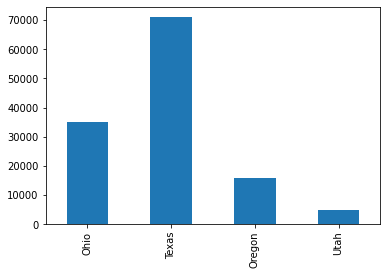

In [76]:
obj3.plot.bar()

In [77]:
obj32 = pd.DataFrame(sdata.items(), columns=['state', 'num'])
obj32

,state,num
0,Ohio,35000
1,Texas,71000
2,Oregon,16000
3,Utah,5000


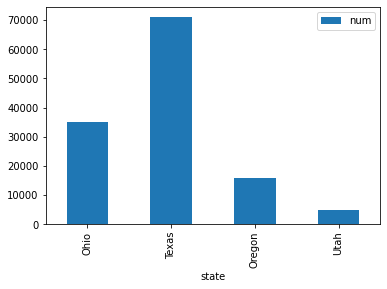

In [78]:
obj32.plot.bar(x='state')

In [79]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
Name: population, dtype: int64

In [80]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

In [81]:
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

### na/null

In [82]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [83]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [84]:
pd.isna(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [85]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [86]:
pd.notna(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

### alignment

In [87]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
Name: population, dtype: int64

In [88]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [89]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

## DataFrame

In [90]:
# DataFrames can be thought of as a dict of Series with shared index

### from dict to dataframe

In [94]:
data = {
    'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
    'year': [2000, 2001, 2003, 2001, 2002, 2003],
    'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2],
}

In [95]:
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2003,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [96]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2003,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [97]:
frame[['year', 'state', 'pop']]

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2003,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [99]:
frame2 = pd.DataFrame(
    data, 
    columns=['year', 'state', 'pop', 'debt'],
    index = ['one', 'two', 'three', 'four', 'five', 'six'],
)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2003,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [100]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [101]:
frame2.index

Index(['one', 'two', 'three', 'four', 'five', 'six'], dtype='object')

### geting a columns from a dataframe

In [102]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [103]:
frame2.state

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

### getting a row from a dataframe

In [105]:
frame2.loc['three']

year     2003
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

### modify columns

In [106]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2003,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [107]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2003,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [109]:
frame2['debt'] = np.arange(6)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0
two,2001,Ohio,1.7,1
three,2003,Ohio,3.6,2
four,2001,Nevada,2.4,3
five,2002,Nevada,2.9,4
six,2003,Nevada,3.2,5


In [110]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2003,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


## Index Objects

In [111]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
obj

a    0
b    1
c    2
dtype: int64

In [112]:
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [113]:
index[1:]

Index(['b', 'c'], dtype='object')